# Analysis of the LEGO online store

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
from IPython.display import display

LOADING DATA

In [40]:
file_path = 'C:/Users/Desktop/Desktop/VisualStudioCode/LEGO_Analysis/Data/zamowienia1.csv'
df = pd.read_csv(file_path, encoding='utf-8', sep=';')

COUNTS HOW MANY ORDERS THERE ARE IN TOTAL

In [41]:
df['order_id'].count()

837

COUNTS HOW MANY LEGO ORDERS THERE ARE IN TOTAL

In [30]:
lego_orders = 0

product_name_columns = [col for col in df.columns if col.startswith('product_name')]

for index, row in df.iterrows():
    found_lego = False
    for col in product_name_columns:
        product = row[col]
    
        if isinstance(product, str) and product.startswith('LEGO'):
            product_code = product[5:9]
            
            if product_code.isdigit() and len(product_code) in [3,4]:
                found_lego = True
                break
                
    if found_lego:
        lego_orders += 1
                
lego_orders
            

669

THE MOST EXPENSIVE ORDERS

In [9]:
top_expensive_orders = df.nlargest(10, 'sum')[['order_id', 'sum', 'date']]
top_expensive_orders

,order_id,sum,date
40,182,3549.92,2022-09-21 19:46
259,501,3249.93,2023-03-19 18:43
104,270,3239.98,2022-11-21 08:18
437,755,2599.99,2023-09-02 17:24
349,628,2520.94,2023-06-18 09:16
480,814,2519.99,2023-09-30 13:10
345,624,2484.85,2023-06-14 21:32
385,678,2449.98,2023-07-22 15:27
304,557,2299.99,2023-05-10 20:28
295,542,1990.97,2023-05-03 22:48


THE LARGEST ORDERS

In [31]:
product_name_columns = [col for col in df.columns if col.startswith('product_name')]
df['product_count'] = df[product_name_columns].notna().sum(axis=1)
top_large_orders = df.nlargest(10, 'product_count')[['order_id', 'product_count', 'date']]
top_large_orders

,order_id,product_count,date
345,624,15,2023-06-14 21:32:00
40,182,8,2022-09-21 19:46:00
183,373,8,2023-01-15 21:17:00
436,754,8,2023-09-01 22:59:00
259,501,7,2023-03-19 18:43:00
317,588,7,2023-05-28 20:56:00
404,708,7,2023-08-03 23:53:00
349,628,6,2023-06-18 09:16:00
560,895,6,2023-11-14 01:12:00
561,896,6,2023-11-14 01:12:00


MONTHLY INCOME FOR ALL ORDERS

,Date,Revenues
0,2022-7,969.96
1,2022-8,5083.67
2,2022-9,8179.56
3,2022-10,7033.56
4,2022-11,11290.97
5,2022-12,15668.81
6,2023-1,8500.32
7,2023-2,11154.18
8,2023-3,8000.15
9,2023-4,6674.01


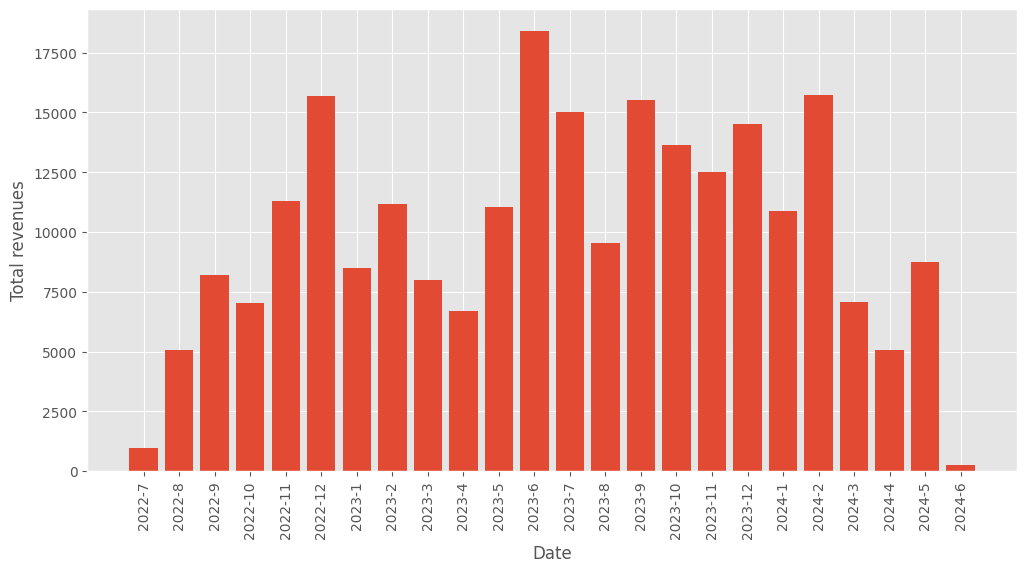

In [34]:
df['date'] = pd.to_datetime(df['date'])

grouped_data = df.groupby([df['date'].dt.year, df['date'].dt.month])

monthly_revenues = {}


for (year, month), group in grouped_data:
    monthly_revenue = round(group['sum'].sum(), 2)
    monthly_revenues[f'{year}-{month}'] = monthly_revenue

months_years = list(monthly_revenues.keys())
monthly_values = list(monthly_revenues.values())

results_monthly = pd.DataFrame(list(monthly_revenues.items()), columns=['Date', 'Revenues'])
display(results_monthly)

plt.figure(figsize=(12,6))
plt.bar(months_years, monthly_values)
plt.xlabel('Date')
plt.ylabel('Total revenues')
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.show()

MONTHLY INCOME FOR LEGO 

,Date,Revenues
0,2022-7,969.96
1,2022-8,5083.67
2,2022-9,8179.56
3,2022-10,7033.56
4,2022-11,11290.97
5,2022-12,15508.82
6,2023-1,8190.36
7,2023-2,10254.25
8,2023-3,7600.18
9,2023-4,5198.12


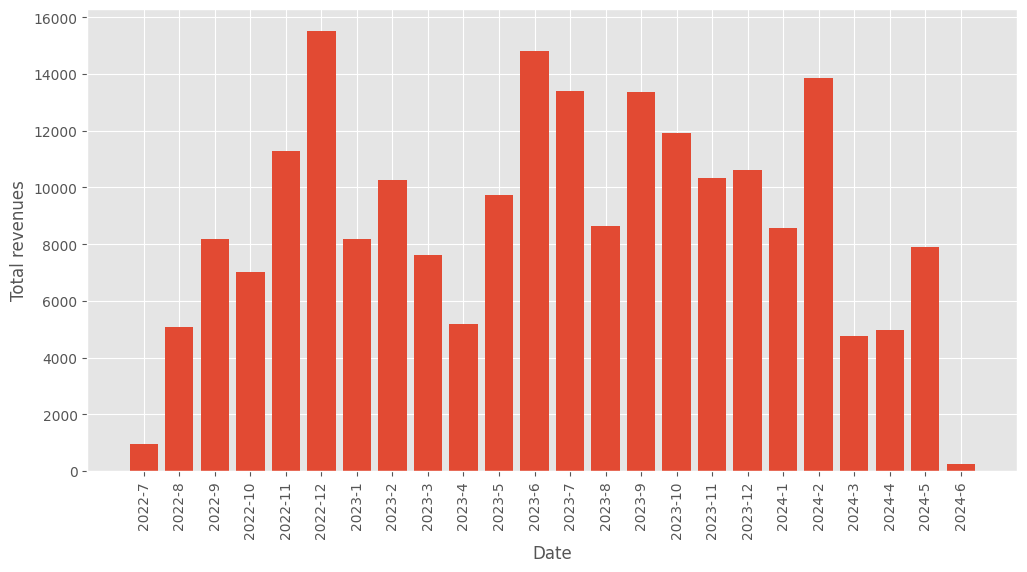

In [35]:
pattern = re.compile(r'LEGO (\d+)')

df['date'] = pd.to_datetime(df['date'])
grouped_data = df.groupby([df['date'].dt.year, df['date'].dt.month])

monthly_revenues_lego = {}

for (year, month), group in grouped_data:
    monthly_revenue = 0
            
    for product_name in group['product_name 1'].dropna().unique():
        if isinstance(product_name, str) and product_name.startswith('LEGO'):
            match = pattern.match(product_name)
            
            if match:
                product_code = match.group(1)
                product = product_name
                        
                monthly_revenue += round(group[group['product_name 1'] == product]['sum'].sum(), 2)

    monthly_revenues_lego[f'{year}-{month}'] = monthly_revenue             

    
results_monthly_lego = pd.DataFrame(list(monthly_revenues_lego.items()), columns=['Date', 'Revenues'])
display(results_monthly_lego)

months_years_lego = list(monthly_revenues_lego.keys())
monthly_values_lego = list(monthly_revenues_lego.values())

plt.figure(figsize=(12,6))
plt.bar(months_years_lego, monthly_values_lego)
plt.xlabel('Date')
plt.ylabel('Total revenues')
plt.xticks(rotation=90)
plt.style.use('ggplot')
plt.show()

THE BEST DAY OF THE MONTH EVERY YEAR

In [36]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

grouped_daily = df.groupby(['year', 'month', 'day'])['sum'].sum().reset_index()

best_day_per_month = grouped_daily.loc[grouped_daily.groupby(['year', 'month'])['sum'].idxmax()]

best_day_per_month

,year,month,day,sum
3,2022,7,31,499.99
6,2022,8,8,1507.92
30,2022,9,21,3549.92
45,2022,10,13,1199.97
69,2022,11,21,3399.97
88,2022,12,15,3260.86
115,2023,1,15,1399.92
133,2023,2,10,1599.99
156,2023,3,19,3249.93
164,2023,4,7,869.97


THE BEST MONTH IN TERMS OF REVENUE

In [22]:
max_monthly_revenues = max(monthly_revenues.values())

for key, value in monthly_revenues.items():
    if value == max_monthly_revenues:
        print(f'The best month in terms of revenues comes is: {key} and amounts to {value}\n')

The best month in terms of revenues comes is: 2023-6 and amounts to 18399.0



THE BEST MONTH IN TERMS OF REVENUE FOR LEGO

In [25]:
max_monthly_revenues_lego = max(monthly_revenues_lego.values())

for key, value in monthly_revenues_lego.items():
    if value == max_monthly_revenues_lego:
        print(f'The best month in terms of LEGO revenues is: {key} and amounts to {value}\n')

The best month in terms of LEGO revenues is: 2022-12 and amounts to 15508.81999999999



BEST SELLING LEGO SETS

,LEGO set,Number of orders
0,LEGO 6008,16
1,LEGO 32171,16
2,LEGO 6020,14
3,LEGO 6007,10
4,LEGO 6034,10
5,LEGO 6246,9
6,LEGO 6235,9
7,LEGO 6125,9
8,LEGO 6790,8
9,LEGO 6712,8


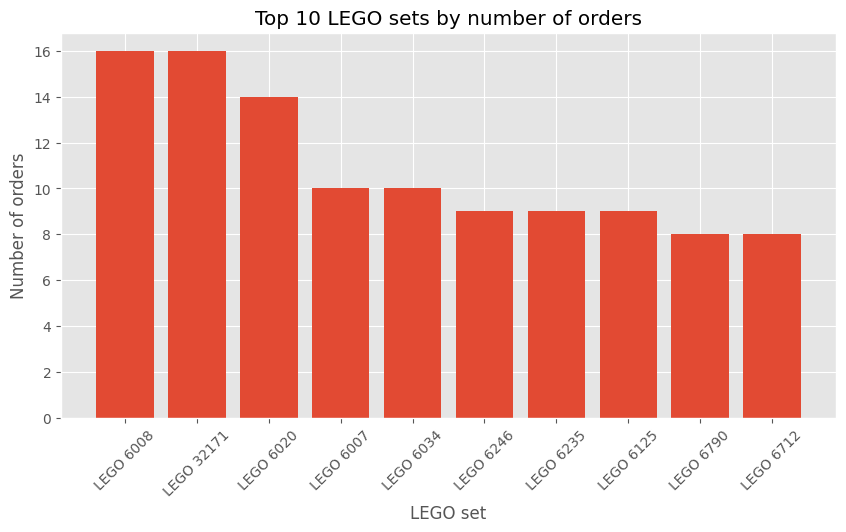

In [38]:
lego_sets = {}

pattern = re.compile(r'LEGO (\d+)')

product_name_columns = [col for col in df.columns if col.startswith('product_name')]

for col in product_name_columns:
    unique_products = df[col].dropna().unique()
    
    for product_name in unique_products:
        if isinstance(product_name, str):
            match = pattern.match(product_name)
            
            if match:
                product_code = match.group(1)
                product = f'LEGO {product_code}'
                
                if product not in lego_sets:
                    lego_sets[product] = 0
                    
                sum_value = (df[col] == product_name).sum()
                lego_sets[product] += sum_value
                
sorted_product = dict(sorted(lego_sets.items(), key=lambda item: item[1], reverse=True))    

results_df = pd.DataFrame(list(sorted_product.items()), columns=['LEGO set', 'Number of orders'])      

top_10_df = results_df.head(10)
display(top_10_df)


# specific_sets = ['LEGO 6008', 'LEGO 80547', 'LEGO 608']
# filtered_df = results_df[results_df['LEGO set'].isin(specific_sets)]
# print(filtered_df)

plt.figure(figsize=(10,5))
plt.bar(top_10_df['LEGO set'], top_10_df['Number of orders'])
plt.title('Top 10 LEGO sets by number of orders')
plt.xlabel('LEGO set')
plt.ylabel('Number of orders')
plt.xticks(rotation=45)
plt.style.use('ggplot')
plt.show()

THE BEST CITY FOR SALES

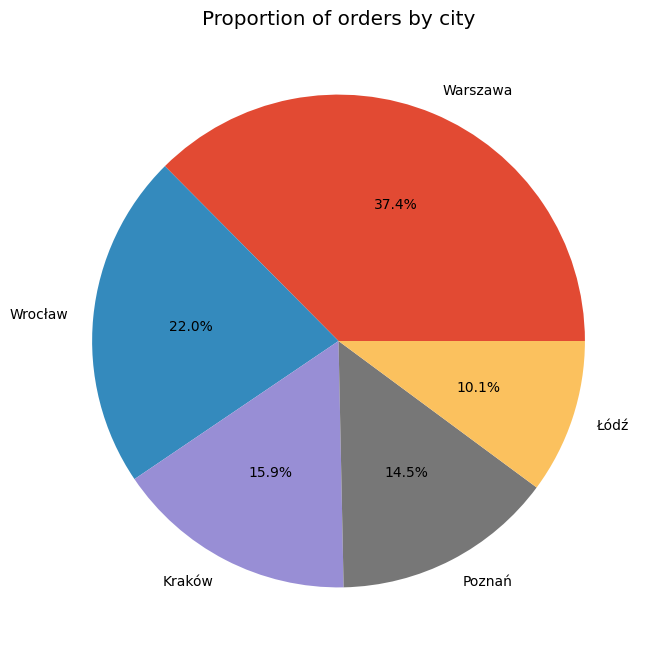

In [39]:
cities = {}
sum_array = []

for index, row in df.drop_duplicates(subset=['city']).iterrows():
    city = row['city'].capitalize()
    cities[city] = {}
    
    sum_value = df[df['city'].str.capitalize() == city]['order_id'].count()
    cities[city] = sum_value

sorted_cities = dict(sorted(cities.items(), key=lambda item: item[1], reverse=True))

# print(sorted_cities)

top_5_cities = list(sorted_cities.items())[:5]

labels = [item[0] for item in top_5_cities]
sizes = [item[1] for item in top_5_cities]


plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Proportion of orders by city')
plt.show()